In [502]:
import pandas as pd
import numpy as np
import os
import torch

# Sequence 데이터로 DataSet 만들기

In [503]:
sequence_data = pd.read_csv('/opt/ml/Recipe_Project/Recipe_datasets/sequence_final.csv') 

In [504]:
sequence_data

,uid,rid,time,star
0,1,6856432,2017-08-27 18:33,5
1,1,6885928,2018-08-15 18:17,5
2,1,6886836,2019-01-08 14:30,4
3,1,6892249,2019-01-25 19:38,5
4,1,6849655,2019-02-07 15:05,5
...,...,...,...,...
152764,14982,6877808,2019-09-05 11:34,5
152765,14983,6914132,2019-06-21 22:42,4
152766,14983,6909646,2019-12-06 19:24,4
152767,14983,6865345,2021-01-02 18:06,4


In [505]:
sequence_data['rid'].nunique()

30241

In [506]:
sequence_data['uid'].nunique()

14983

In [507]:
sequence_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152769 entries, 0 to 152768
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   uid     152769 non-null  int64 
 1   rid     152769 non-null  int64 
 2   time    152769 non-null  object
 3   star    152769 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.7+ MB


In [508]:
sequence_data.groupby('star').count()

,uid,rid,time
star,,,
1,142,142,142
2,275,275,275
3,1742,1742,1742
4,10063,10063,10063
5,140547,140547,140547


In [509]:
condition = ((sequence_data['star']==4) | (sequence_data['star']==5)) # or 말고 | 사용해야 먹힌다.
sequence_data = sequence_data[condition]
sequence_data

,uid,rid,time,star
0,1,6856432,2017-08-27 18:33,5
1,1,6885928,2018-08-15 18:17,5
2,1,6886836,2019-01-08 14:30,4
3,1,6892249,2019-01-25 19:38,5
4,1,6849655,2019-02-07 15:05,5
...,...,...,...,...
152764,14982,6877808,2019-09-05 11:34,5
152765,14983,6914132,2019-06-21 22:42,4
152766,14983,6909646,2019-12-06 19:24,4
152767,14983,6865345,2021-01-02 18:06,4


In [510]:
rid_counts = dict(sequence_data['rid'].value_counts())

In [511]:
rid_counts

{6876357: 760,
 6884636: 671,
 6906655: 606,
 6891816: 578,
 6883937: 558,
 6912220: 512,
 6884469: 464,
 6859263: 461,
 6879215: 456,
 6885928: 423,
 6845428: 415,
 3568149: 409,
 6873683: 407,
 6896724: 387,
 1785098: 377,
 6845113: 372,
 6879533: 356,
 5590466: 351,
 6864674: 349,
 6894096: 344,
 6871949: 344,
 5407249: 344,
 6880798: 341,
 6867849: 338,
 6872975: 327,
 6885185: 322,
 6876121: 312,
 6887142: 291,
 6897261: 290,
 6882172: 285,
 6870562: 282,
 6893285: 268,
 6868260: 265,
 6830820: 258,
 6917883: 252,
 6905196: 245,
 6899335: 237,
 6868306: 236,
 6832325: 235,
 6855118: 235,
 6872350: 228,
 6836180: 226,
 6881815: 220,
 6903507: 220,
 6832126: 216,
 6896908: 215,
 6840027: 215,
 6892138: 212,
 6905743: 212,
 6867256: 212,
 6923068: 210,
 6881454: 202,
 6870391: 201,
 6895383: 200,
 6842041: 200,
 6830500: 199,
 6871728: 198,
 6871912: 195,
 6874444: 194,
 6865170: 191,
 6886559: 190,
 6871104: 188,
 6868921: 187,
 6877896: 183,
 6893092: 180,
 6906497: 180,
 6891526: 

In [512]:
sequence_data['rid'].value_counts()

6876357    760
6884636    671
6906655    606
6891816    578
6883937    558
          ... 
6890866      1
6604965      1
6872328      1
6853941      1
6914132      1
Name: rid, Length: 29789, dtype: int64

In [513]:
(sequence_data['rid'].value_counts() == 1).sum()

15357

In [514]:
(sequence_data['rid'].value_counts() == 2).sum()

5103

In [515]:
(sequence_data['rid'].value_counts() == 3).sum()

2550

In [516]:
(sequence_data['rid'].value_counts() <= 10).sum()

27452

In [517]:
(sequence_data['rid'].value_counts() <= 20).sum()

28614

In [518]:
(sequence_data['rid'].value_counts() >= 10).sum()

2565

<Axes: >

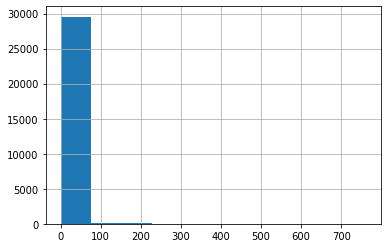

In [520]:
#엄청난 데이터 불균형...
sequence_data['rid'].value_counts().hist()

In [521]:
threshold = 10
sequence_data = sequence_data[sequence_data['rid'].map(lambda x: rid_counts[x]) <= threshold]
sequence_data.reset_index()

,index,uid,rid,time,star
0,0,1,6856432,2017-08-27 18:33,5
1,2,1,6886836,2019-01-08 14:30,4
2,4,1,6849655,2019-02-07 15:05,5
3,6,1,6874146,2019-10-05 19:52,5
4,14,1,6852429,2020-08-04 18:07,5
...,...,...,...,...,...
59006,152753,14981,6872713,2018-07-01 04:27,5
59007,152754,14981,6889974,2018-07-02 07:40,5
59008,152757,14982,6868075,2017-09-06 23:03,5
59009,152759,14982,6838565,2017-10-30 15:19,5


<Axes: >

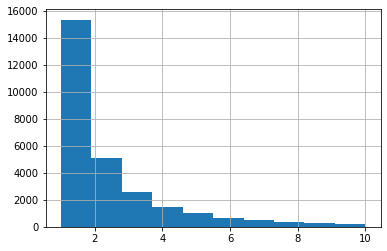

In [522]:
sequence_data['rid'].value_counts().hist()

# LabelEncoder fit and Sequence Dataset transform

In [523]:
from sklearn.preprocessing import LabelEncoder

userid_LE = LabelEncoder()
userid_LE.fit(sequence_data['uid'])
sequence_data['uid'] = userid_LE.transform(sequence_data['uid'])
sequence_data

/tmp/ipykernel_37950/1852113760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sequence_data['uid'] = userid_LE.transform(sequence_data['uid'])


,uid,rid,time,star
0,0,6856432,2017-08-27 18:33,5
2,0,6886836,2019-01-08 14:30,4
4,0,6849655,2019-02-07 15:05,5
6,0,6874146,2019-10-05 19:52,5
14,0,6852429,2020-08-04 18:07,5
...,...,...,...,...
152753,13183,6872713,2018-07-01 04:27,5
152754,13183,6889974,2018-07-02 07:40,5
152757,13184,6868075,2017-09-06 23:03,5
152759,13184,6838565,2017-10-30 15:19,5


In [524]:
sequence_data['uid']

0             0
2             0
4             0
6             0
14            0
          ...  
152753    13183
152754    13183
152757    13184
152759    13184
152765    13185
Name: uid, Length: 59011, dtype: int64

In [525]:
list(sequence_data['uid'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [526]:
sequence_data

,uid,rid,time,star
0,0,6856432,2017-08-27 18:33,5
2,0,6886836,2019-01-08 14:30,4
4,0,6849655,2019-02-07 15:05,5
6,0,6874146,2019-10-05 19:52,5
14,0,6852429,2020-08-04 18:07,5
...,...,...,...,...
152753,13183,6872713,2018-07-01 04:27,5
152754,13183,6889974,2018-07-02 07:40,5
152757,13184,6868075,2017-09-06 23:03,5
152759,13184,6838565,2017-10-30 15:19,5


In [527]:
max(list(sequence_data['uid'].unique()))

13185

# User Label 인코딩

In [528]:
import pickle

user_label_mapping = {label: i for i, label in enumerate(list(sequence_data['uid'].unique()))}

with open('/opt/ml/Recipe_Project/Recipe_code/ultragcn/Userid_label_encoder.pickle', 'wb') as file:
    pickle.dump(user_label_mapping, file)

# Recipe_Label 인코딩

In [469]:
from sklearn.preprocessing import LabelEncoder

recipeid_LE = LabelEncoder()
recipeid_LE.fit(sequence_data['rid'])
sequence_data['rid'] = recipeid_LE.transform(sequence_data['rid'])
sequence_data

/tmp/ipykernel_37950/2015008733.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sequence_data['rid'] = recipeid_LE.transform(sequence_data['rid'])


,uid,rid,time,star
0,0,7615,2017-08-27 18:33,5
2,0,13534,2019-01-08 14:30,4
4,0,6415,2019-02-07 15:05,5
6,0,11143,2019-10-05 19:52,5
14,0,6956,2020-08-04 18:07,5
...,...,...,...,...
152753,13183,10915,2018-07-01 04:27,5
152754,13183,14114,2018-07-02 07:40,5
152757,13184,9946,2017-09-06 23:03,5
152759,13184,4599,2017-10-30 15:19,5


In [470]:
sequence_data.groupby('uid')['rid'].count()

uid
0         5
1        20
2         3
3         1
4        17
         ..
13181     1
13182     2
13183     3
13184     2
13185     1
Name: rid, Length: 13186, dtype: int64

# 유저 선호 레시피 인코딩

In [471]:
user_prefer_recipe = [6914132, 6856432]

user_prefer_recipe = recipeid_LE.transform(user_prefer_recipe)
user_prefer_recipe

array([18819,  7615])

# 유저 선호 레시피 디코딩

In [472]:
user_prefer_recipe = recipeid_LE.inverse_transform(user_prefer_recipe)
user_prefer_recipe

array([6914132, 6856432])

# 라벨 인코더 피클로 저장

In [473]:
import joblib
Recipeid_LE_path = '/opt/ml/Recipe_Project/Recipe_code/ultragcn/Recipeid_label_encoder.pkl'
joblib.dump(recipeid_LE, Recipeid_LE_path)

['/opt/ml/Recipe_Project/Recipe_code/ultragcn/Recipeid_label_encoder.pkl']

# Train Dataset, Test Dataset 나누기

In [474]:
f = open('/opt/ml/Recipe_Project/Recipe_code/ultragcn/data/Ultragcn_Recipe_Data/ultragcn_recipe_train_data.txt', 'w')
tf = open('/opt/ml/Recipe_Project/Recipe_code/ultragcn/data/Ultragcn_Recipe_Data/ultragcn_recipe_test_data.txt', 'w')
for i,v in sequence_data.groupby('uid')['rid']:
    f.write(str(i))
    f.write(' ')
    if(len(v.values)<10):
        f.write(' '.join(str(e) for e in v.values))
    else:
        f.write(' '.join(str(e) for e in v.values[:int((len(v.values)/10)*9)]))
    f.write('\n')
    if(len(v.values)>=10):
        tf.write(str(i))
        tf.write(' ')
        tf.write(' '.join(str(e) for e in v.values[(int(len(v.values)/10)*9):]))
        tf.write('\n')
f.close()
tf.close()